<h3>Import Packages</h3>

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import os


<h3>Load VGG16 Model and Added Extra Convolution and MaxPooling Layers</h3>

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

model_rms = Model(inputs=base_model.input, outputs=x)
for layer in base_model.layers:
    layer.trainable = False

model_rms.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

<h3>Sample Images from DataSet with Labels</h3>

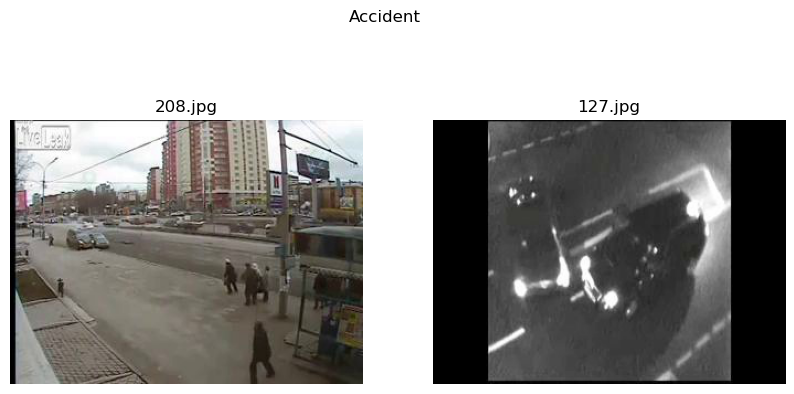

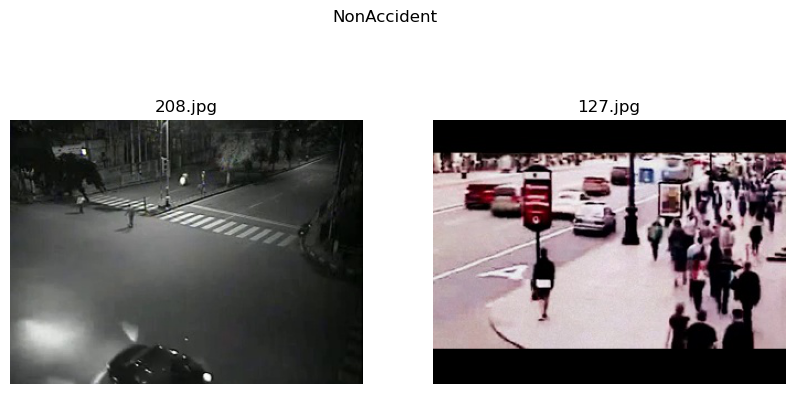

In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the folder containing images
folder_path = ['E://MS_USD//Course 2_AAI-501//FinalProject//Train//Accident', 'E://MS_USD//Course 2_AAI-501//FinalProject//Train//NonAccident']
files=["208.jpg","127.jpg"]

for i in folder_path:
    # List all files in the folder
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(i.split("//")[-1])
    count=0
    # Read and display images
    for j in files:
        image_path = os.path.join(i, j)
        image = Image.open(image_path)
        # Display the image using Matplotlib
        axs[count].imshow(image)
        axs[count].set_title(j)
        axs[count].axis('off')
        count+=1

    plt.show()

<h3>Creation of Train, test and validation generators for model training</h3>

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, )

train_generator = train_datagen.flow_from_directory(
    'E://MS_USD//Course 2_AAI-501//FinalProject//Train',  # Replace with the path to your train folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 12966 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Accident': 0, 'NonAccident': 1}

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    'E://MS_USD//Course 2_AAI-501//FinalProject//Validation',  # Replace with the path to your validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4322 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'E://MS_USD//Course 2_AAI-501//FinalProject//Test',  # Replace with the path to your validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4323 images belonging to 2 classes.


<h3>Model Checkpoints for storing model as .keras file and for contnous monitoring of the model after every epoch</h3>

In [19]:
early_stopping = EarlyStopping(
monitor='val_loss', # Monitor validation accuracy
# min_delta=0.001, # Minimum change to qualify as an improvement
patience=10, # Number of epochs to wait for an improvement
verbose=1,
# mode='max', # Stop when the quantity monitored has stopped increasing
restore_best_weights=True # Restore the weights of the best epoch
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00001
    )

In [21]:
def trainModel(model):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        callbacks=[early_stopping]
        )
    return history


<h3>Model trained for 30 Epochs Without added layers</h3>

In [23]:
trainedHistory_rms = trainModel(model_rms)

Epoch 1/5
405/405 ━━━━━━━━━━━━━━━━━━━━ 2705s 7s/step - accuracy: 0.7704 - loss: 0.5302 - val_accuracy: 0.3558 - val_loss: 2.4718
Epoch 2/5
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7188 - loss: 0.5483 - val_accuracy: 0.5000 - val_loss: 0.8521
Epoch 3/5
405/405 ━━━━━━━━━━━━━━━━━━━━ 2755s 7s/step - accuracy: 0.7895 - loss: 0.4410 - val_accuracy: 0.3637 - val_loss: 2.7428
Epoch 4/5
405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7188 - loss: 0.3738 - val_accuracy: 0.5000 - val_loss: 0.9395
Epoch 5/5
405/405 ━━━━━━━━━━━━━━━━━━━━ 2739s 7s/step - accuracy: 0.7829 - loss: 0.4327 - val_accuracy: 0.3475 - val_loss: 3.7533
Restoring model weights from the end of the best epoch: 2.


In [24]:
import pickle 
with open('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\RmsPropModel\\model_30Epochs_history.pkl', 'wb') as file: 
    pickle.dump(trainedHistory_rms.history,file)

In [25]:
model_rms.save('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\RmsPropModel\\rms_model_30Epochs.keras')

In [ ]:
import pickle 
with open('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\RmsPropModel\\model_Epochs_history_AddedLayers.pkl', 'wb') as file: 
    pickle.dump(trainedHistory_rms.history,file)
model_rms.save('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\RmsPropModel\\rms_model_AddedLayers.keras')

In [1]:
def validationReport(model):
    y_pred = model.predict(validation_generator) 
    y_pred_classes = (y_pred > 0.5).astype("int32") # For binary classification 
    y_true = validation_generator.classes # Generate classification report 
    print("Validation Generator")
    # print(y_pred_classes)
    print(classification_report(y_true, y_pred_classes)) # Print confusion matrix 
    print(confusion_matrix(y_true, y_pred_classes))

def testReport(model):
    y_pred = model.predict(test_generator)
    y_pred_classes = (y_pred > 0.5).astype("int32") # For binary classification 
    y_true = test_generator.classes # Generate classification report 
    print("Test Generator")
    # print(y_pred_classes)
    print(classification_report(y_true, y_pred_classes)) # Print confusion matrix 
    print(confusion_matrix(y_true, y_pred_classes))

<h3>Model Validation(Confusion Matrix, Accuracy, Preision etc.) by executing the model for different models at different epochs</h3>

In [7]:
model_valAcc_38 = load_model('E:\\MS_USD\\Course 2_AAI-501\\FinalProject\\RmsPropModel\\rms_model_30Epochs.keras')
validationReport(model_valAcc_38)
print("------------")
testReport(model_valAcc_38)

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 729s 5s/step
Validation Generator
              precision    recall  f1-score   support

           0       0.29      0.58      0.39      1238
           1       0.72      0.42      0.53      3084

    accuracy                           0.47      4322
   macro avg       0.50      0.50      0.46      4322
weighted avg       0.59      0.47      0.49      4322

[[ 719  519]
 [1778 1306]]
------------


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


136/136 ━━━━━━━━━━━━━━━━━━━━ 749s 6s/step
Test Generator
              precision    recall  f1-score   support

           0       0.29      0.73      0.42      1239
           1       0.72      0.28      0.40      3084

    accuracy                           0.41      4323
   macro avg       0.51      0.51      0.41      4323
weighted avg       0.60      0.41      0.41      4323

[[ 908  331]
 [2225  859]]


<h3>Best Model Summary</h3>

In [11]:
model_valAcc_38.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,406,852 (154.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,846,083 (49.00 MB)

<h3>Model Predcition on Test Dataset</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Accident


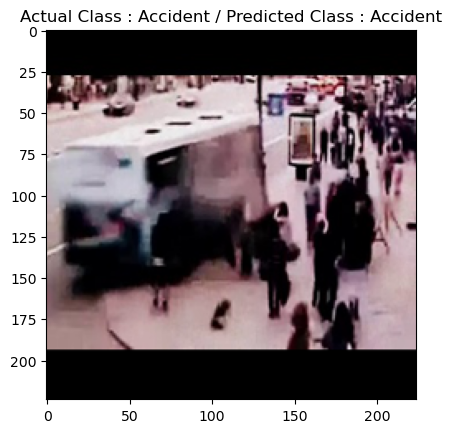

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
Non Accident


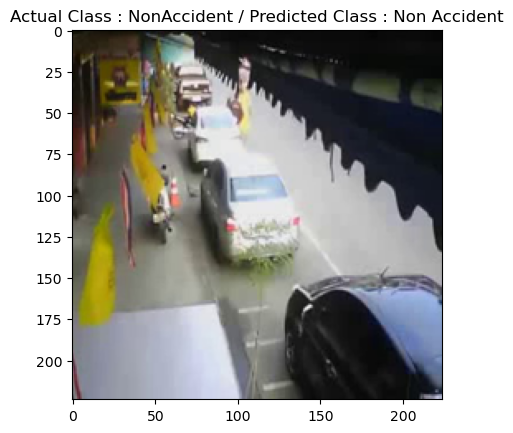

In [9]:
from PIL import Image
import numpy as np

def preprocess_image(image_path, target_size):
    # Load the image
    image = Image.open(image_path)
    # Resize the image to the target size
    image = image.resize(target_size)
    # Convert the image to a NumPy array
    image_array = np.array(image)
    # Normalize the image data to 0-1 range
    image_array = image_array / 255.0
    # Expand dimensions to match the model input
    image_array = np.expand_dims(image_array, axis=0)
    return image_array, image

# Define the path to the image and the target size
image_path = ['E://MS_USD//Course 2_AAI-501//FinalProject//Test//Accident//673.jpg', 'E://MS_USD//Course 2_AAI-501//FinalProject//Test//NonAccident//890.jpg']
target_size = (224, 224)  # Example target size, adjust based on your model's input
for i in image_path:
    # Preprocess the image
    preprocessed_image, image = preprocess_image(i, target_size)
    
    predictions = model_valAcc_38.predict(preprocessed_image)
    className = "Accident" if predictions<0.5 else "Non Accident"  
    print(className)
    plt.imshow(image)
    plt.title(f"Actual Class : {i.split("//")[-2]} / Predicted Class : {className}")
    plt.show()

<center><h2>Inference</h2></center>
<h4>Summary</h4>
<ol>
<li>Train dataset contains 12966 images</li>
<li>Validation dataset contains 4322 images</li>
<li>Test dataset contains 4323 images</li>
<li>Optimizer used is RmsProp</li>
<li>Learning parameter (alpha) 0.001 </li>
<li>The best model had a validation accuracy of 38% and test accuracy of 41%</li>
</ol>
<h4>Conculsion</h4>
<p>The dataset which had both accident and non accident images are not segregated properly in source dataset. Data cleaning is mandatory and the source dataset with close to 20000 images needs to be labelled appropriately for better training of the model. It is evident with manual validation that certain non accident images are places in accident folder, but cleaning and preprocessing of less weightage for the current module as given in the final project description.</p>